In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def listArrivee(tempsMax,lam):
    L=[]
    t=0.0
    
    while t<=tempsMax-dt:
        t+=np.random.exponential(lam)
        L.append(t)
    
    return np.array(L)

In [112]:
def addProcess_2S(tmax=300, lama=30, l_lamd=[30],nbService=10, nbPers=0):
    a=0
    lTmps = [0]
    l_nbService= nbService*[0]
    
    t = 0.0  # temps du derniere evenement
    assert len(l_lamd) == len(l_nbService)
    # None represente une valeur a definir dans la boucle
    dta = None  # delta inter arrivee
    dtd = nbService * [None]  # deltas inter departs
    cpt = nbPers 
    cpt_T = [np.copy(cpt)]  # liste qui accumule les etats des files d'attente a chaque evenement 
    caisse =[]
    while True:

        # dtdMin = np.argmin(dtd)
        # cptMin = np.argmin(cpt)
        
        if dta is None:
            # la prochaine arrivee n'est pas definie, on la redefinie 
            dta = (np.random.exponential(lama)) #Avec la file unique l'arrivée d'une personne est frocement plus rapide
            
        for i in range(nbService):
            if dtd[i] is None and l_nbService[i] > 0:
                # le prochain depart n'est definie pour cette file, on le redefini
                dtd[i] = np.random.exponential(l_lamd[i])
                
            
        
        # on recherche le delta le plus proche dans le temps
        dtdMin = np.inf
        imin = None
        for i in range(nbService):
            if dtd[i] is not None and dtdMin > dtd[i]:
                dtdMin = dtd[i]
                imin = i
            
        if imin is not None:
            # cas ou l'arrivee est en concurence avec les departs
            if dtd[imin] > dta:
                #l'arrivee se produit avant les departs
                t += dta
                for i in range(nbService):
                    if dtd[i] is not None:
                        dtd[i] -= dta   
                cpt += 1
                dta = None 
                for i in range(nbService):
                    if l_nbService[i]==0 and a==0:
                        l_nbService[i]=1
                        a=1
                a=0
            else:
                # le depart le plus proche se produit avant la prochaine arrivee
                t += dtd[imin]
                dta -= dtd[imin]
                for i in range(nbService):
                    if dtd[i] is not None:
                        dtd[i] -= dtd[imin]
                dtd[imin] = None
                cpt -= 1
                l_nbService[imin]=0
                if cpt > 1:
                    for i in range(nbService):
                        if l_nbService[i]==0 and a==0 and i!= imin:
                            l_nbService[i]=1
                            a=1
                    a=0
                
        
        else:
            #cas ou l'arrivee est la seul possibilitee
            k = np.random.randint(nbService)  # choix d'une file au hasard
            l_nbService[k]=1
            cpt += 1
            t += dta 
            dta = None  
            
        #verification de si on ne depasse pas les bornes de la simulation
        if t > tmax:
            break

        lTmps.append(t)
        cpt_T.append((np.copy(cpt),np.copy(l_nbService)))
        
    return lTmps,cpt_T 

In [113]:
addProcess_2S(tmax=300, lama=5, l_lamd=[15,12,4],nbService=3, nbPers=0)

([0,
  9.427333722144512,
  9.565447224658268,
  15.903683661679043,
  16.38534334665819,
  17.61754800217288,
  20.934811463951622,
  22.959931626774367,
  24.006043597625286,
  24.205450674685512,
  25.46584567925523,
  25.7210766672592,
  26.755112219697622,
  27.67064279146296,
  28.13795338008764,
  30.993882801418927,
  31.598865263650957,
  35.52155738533149,
  39.31681855074163,
  40.97429826379002,
  42.13655973330391,
  42.79198328581274,
  42.84372869695243,
  43.74072170457674,
  44.02311784495152,
  47.79043860678634,
  48.7469378264307,
  52.764739769206244,
  53.64761050852018,
  54.4101241531749,
  54.8113515452653,
  55.11602940222634,
  56.879892974129845,
  59.001300601918224,
  60.541606927532804,
  62.10439606027121,
  62.93951300777918,
  66.03638794625682,
  69.3453231625562,
  70.25595033666576,
  71.16690997037763,
  71.3242673617811,
  71.69930350762495,
  72.79982304578549,
  74.1890449800818,
  74.66974532957374,
  74.83545338640911,
  76.66180896450838,
  7

In [105]:
def plotprocess(evenement,cpt):
    x = np.copy(evenement)
    y = cpt
    plt.step(x,y,where = "post")

In [7]:
def multiplotprocess(tps,cpt):
    for i in range(len(cpt[0])):
        plotprocess(tps,dissocierList(cpt,i))
        
   
    plt.xlabel("time(s)")
    plt.ylabel("number of clients")

In [8]:
def dissocierList(L,j):
    
    res = []
    
    for i in range(len(L)):
        res.append(L[i][j])
    
    return res

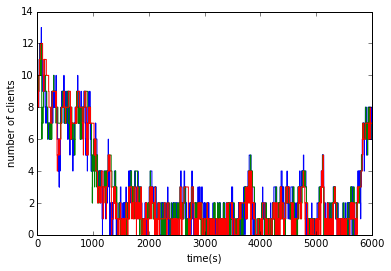

In [9]:
event,cpt = addProcess_2S(tmax=6000, lama=5, l_lamd=[10,12,10], l_nbPers=[10,10,10])
multiplotprocess(event,cpt)

In [10]:
def step(lama, l_lamd, dta, dtd, t, cpt):
    
    assert len(l_lamd) == len(cpt)
    nbService = len(l_lamd) 
    
    if dta is None:
        # la prochaine arrivee n'est pas definie, on la redefinie 
        dta = np.random.exponential(lama)
            
    for i in range(nbService):
        if dtd[i] is None and cpt[i] > 0:
            # le prochain depart n'est definie pour cette file, on le redefini
            dtd[i] = np.random.exponential(l_lamd[i])
        
    # on recherche le delta le plus proche dans le temps
    dtdMin = np.inf
    imin = None
    for i in range(nbService):
        if dtd[i] is not None and dtdMin > dtd[i]:
            dtdMin = dtd[i]
            imin = i
            
    if imin is not None:
        # cas ou l'arrivee est en concurence avec les departs
        if dtd[imin] > dta:
            #l'arrivee se produit avant les desparts
            cptMin = np.inf
            cpt_i = None
            t += dta
            for i in range(nbService):
                if dtd[i] is not None:
                    dtd[i] -= dta
                if cpt[i] < cptMin:
                    cptMin = cpt[i]
                    cpt_i = i   
            cpt[cpt_i] += 1
            dta = None          
        else:
            # le depart le plus proche se produit avant la prochaine arrivee
            t += dtd[imin]
            dta -= dtd[imin]
            for i in range(nbService):
                if dtd[i] is not None:
                    dtd[i] -= dtd[imin]
            dtd[imin] = None
            cpt[imin] -= 1
        
    else:
        #cas ou l'arrivee est la seul possibilitee
        t += dta
        k = np.random.randint(nbService)  # choix d'une file au hasard
        cpt[k] += 1
        dta = None  

    return dta,dtd,t,cpt
    

In [11]:
lam_a = 10
lam_d = [20,20,20]
dta = np.random.exponential(lam_a)
dtd = [None,None,None]
cpt = [0,0,0]
t = 0.0